# Debugging

Nada más clásico que correr un código y que salga un mensaje de error. Y nada peor que el mensaje de error aparezca luego de largos minutos de espera. Aquí aprenderemos a utilizar técnicas básicas de debugging y además a usar tres herramientas que nos podrán ayudar aún más a encontrar errores de manera rápida y eficaz. Los erroes vienen de muchas maneras, desde simples typos o erroes en el orden de las lineas, hasta loops infinitos y listas vacías. 

Para muchos casos, python mostrará un mensaje que apuntará directamente a donde está el error. Por eso lo primero será leer con atención el mensaje, buscar y corregir el error. 
Aquí un ejemplo sencillo con varios errores de diferente tipo para que lo corrigas.

In [108]:
a = 2
b = '2'
print(a+b)
print(a+b+c)
c = 3

while True print('Hello world")

SyntaxError: invalid syntax (<ipython-input-108-c7d9a769dfde>, line 7)

Los buenos mensajes de error te dirán exactamente qué ha ido mal y dónde ha ocurrido, pero es muy difícil escribir mensajes de error que sean útiles en todas las situaciones. Esto sucederá especialmente cuando estamos usando una función proveniente de algún paquete. Cuando te encuentres con un mensaje de error que no entiendas, es una buena práctica buscarlo en Google (literalmente, sólo tienes que copiar el mensaje de error y pegarlo en Google) para ver si alguien más se ha encontrado con ese error. StackOverflow es especialmente útil. Pruébalo con el siguiente mensaje de error, y corrige el código para que te dé la fuerza electrostática en Dinas.

In [9]:
from astropy import units as u, constants as cst

# calcular la fuerza electrostatica entre un proton y un electron
force = cst.e**2 / (1 * u.angstrom)**2

TypeError: Constant 'e' does not have physically compatible units across all systems of units and cannot be combined with other values without specifying a system (eg. e.emu)

Otra buena practica para estos casos sería buscar la documentación del paquete y leer con cuidado cómo llamar a cada función o variable.

   _______________________________________________________________________________________________________

Ahora claro, los errores realmente problematicos son distintos, como cuando hay muchos errores de manejo de las variables y funciones, impidiendo que el código corra y viendo error tras error, o incluzo cuando el código parece correr sin problemas pero el resultado no tienen sentido. Puede ser quizá que la imagen que querías hacer aparece vacía, que se queda en un loop infinito o que una matriz de numeros termina con un solo elemento. Estos erroes más complejos tendrémos que atacarlos de manera distinta.

## Tecnicas básicas de debuggin para cualquier momento

Lo primero que podemos hacer es revisar el código manualmente imprmiendo variables intermedias usando ```print(var_int)```. Esto puede ayudar si el error es relativamente sencillo, pero suele ser muy ineficiente ya que implica correr el código muchas veces, y dejando que el código falle cada vez hasta solucionar el problema. 

Toma el siguiente código y encuentra los errores. Ayúdate de esta técnica básica para ir viendo qué está pasando.

In [101]:
import random

def CalcularMaxMin(lista):
    return max(lista), min(lista)

numeros = []
#Inicializo la lista con valores aleatorios
for i in range(20):
    numeros.append(random.randint(1, 100))
    
vmax,vmin = CalcularMaxMin(numeros)
print('El valor maximo es ', vmax)
print('El valor minimo es ', vmin)

numero = int(input('Dime un numero del 1 al 100: '))

while numero<0 or numero>100:
    print('El numero debe estar entre 1 y 100')
    numero = int(input('Dime un numero del 1 al 100: '))

if numero in numero:
    print('El numero está en la lista')
else:
    print('El numero no está en la lista')

El valor maximo es  100
El valor minimo es  1
Dime un numero del 1 al 100: 1


TypeError: argument of type 'int' is not iterable

### Tips generales de debugging

No hay una receta única para debuggear. Sin embargo, aquí hay algunos consejos generales para debuguear que pueden ser útiles

  * Si no tienes idea de lo que está roto, identifica lo que está funcionando y trata de usar el proceso de eliminación.
  * Un buen método de proceso de eliminación es la búsqueda binaria: ver si es la primera mitad del código la que está rompiendo las cosas, o la segunda mitad. Si es la primera mitad, entonces comprueba el primer cuarto frente al segundo. Sigue repitiendo y aislando el error de esta manera.
  * Busca en Google los mensajes de error, especialmente si son específicos, para ver si alguien más tiene pistas o indicios. Sin embargo, piense en los comandos que le sugieren que escriba, y no los escriba a ciegas.


____________ 

Hay herramientas más robustas que nos facilitan la pega y nos permiten ir avanzando linea por linea, cosa de no llegar directo al error y poder tener más control sobre lo que va pasando en el código. Y decir que es solo eso sería muy simplista, realmente son herramientas muy poderosas que hay que ver en más detalle. Aquí veremos tres que son particularmente útiles y populares. 

## PDB: The Python Debugger

Este modulo nos permite debuggiar un código directamente desde la terminal. Esto puede ser especialmente útil al trabajar con una conexión remota, pero puede parecer algo hostil para usos más cotidianos. 

Este debugger se invoca desde la terminal de la siguiente manera:

- ```$ python -m pdb my_script_to_debug.py```

Con este comando comenzaremos a poder navegar dentro del script usando una serie de comandos. Siempre es útil saber de primero que con `h` podemos ver todos los comandos disponibles y luego con ``help <comando>`` podemos ver qué hace cada uno.

### Actividad pdb 
Para aprender a usar PDB, abre el script ``brokenArt_for_pdb_debug.py`` y una terminal (en jupyter o de la manera que quieras) e intenta debugear el código utilizando pdb desde la terminal.

Una vez en el debbuger, este se colocará al comiezo del script. Con el comando ``c`` continúa la ejecución hasta detenerse cuando se encuentre un breakpoint. Si hacemos esto, nos mostrará dónde falla. Luego de fallar, podemos entrar en lo que se llama *post-mortem debugger*, que consiste en inspeccionar el estado de un script que ha fallado de alguna manera, con el fin de determinar las condiciones que han conducido al fallo. Ahí podremos ver el estado de cada una de las variables y objetos y evaluar la situación previa al fallo. Por ejemplo, prueba ver el valor de `dim1`. De nuevo `c` y volvemos a donde empezamos. Esta vez usemos `n` para navegar por el código linea por linea. Si aprietas enter sin darle un nuevo comando repetirá el anterior. Intenta moverte con estos comandos e inspecciona los valores de los objetos y variables a medida que se crean. 

Ahora encuentra el bug y disfruta del pixel Art! 

Deberías lograr una imagen algo así
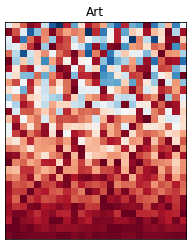

   _______________________________________________________________________________________________________

## VS Code Debugger

VS Code es de las herramientas más utilizadas para desarrollar código, y una de sus maravillas es el debugger que viene incluido. Su uso es bastante intuitivo e interactivo. Será una ayuda perfecta a la hora de encontrar bugs. Nos permitirá hacer lo mismo que pdb y más, pero necesitaremos estar en la aplicación e intaractuar con la interfaz gráfica.

A travez de anaconda abre VS Code. Abre el código ``buscaminas_for_debug_vscode.py``, leelo y empezemos el debugging.

Lo primero que tenemos que hacer es 
Para abrir la *Run view*, seleccione el icono de *Run* en la barra de actividades en el lado de VS Code. También puede utilizar el atajo de teclado Ctrl+Shift+D.
Deberías ver algo así

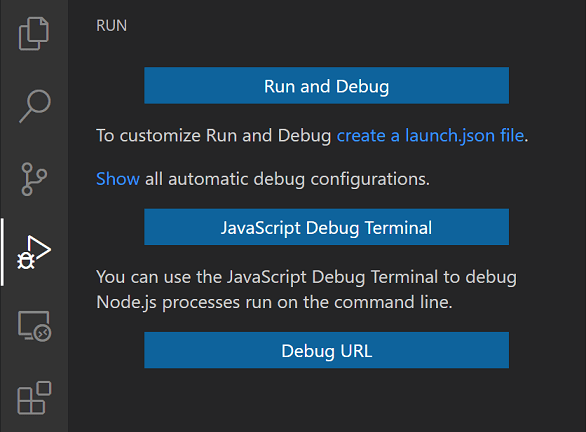

Cuando hagas clic en él, debería aparecer un enlace desplegable que te preguntará qué tipo de debugging quieres hacer, y selecciona "Python File":

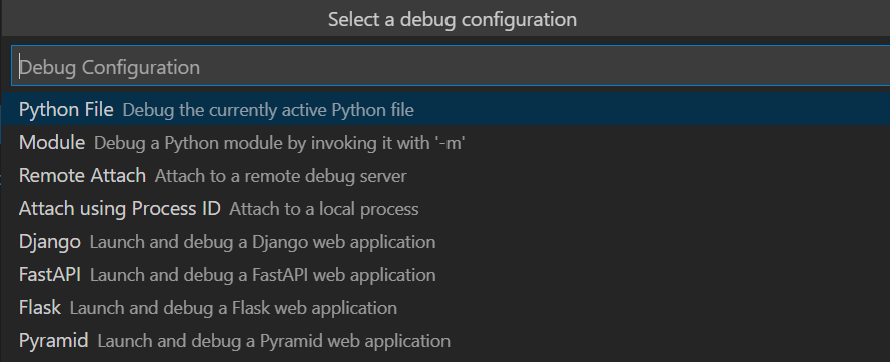

Esto debería crear un archivo `.vscode/launch.json` en el directorio base, con la configuración por defecto para debugear un archivo Python. Ahora estamos casi listos, pero sugiero añadir la siguiente línea dentro de la lista de configuraciones:

``` "cwd": "${fileDirname}" ```

Esto hace que el directorio de trabajo actual del debugger sea siempre el directorio en el que se encuentra el archivo Python que estás debuggeando. Para comprobar que lo has configurado todo correctamente, debería ser casi idéntico a lo siguiente:


Deberías lograr algo así

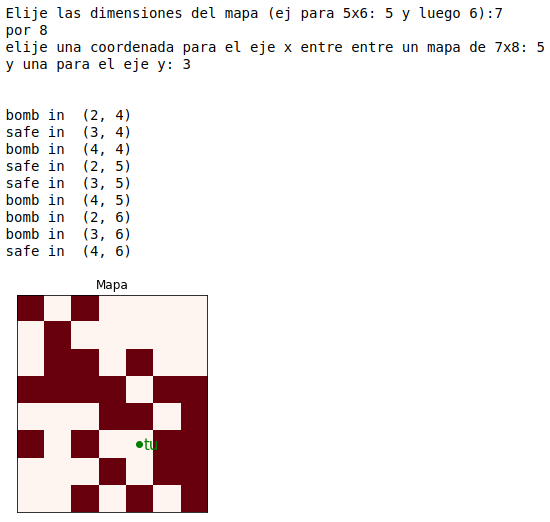

   _______________________________________________________________________________________________________ 

## PyCharm Debugger

PyCharm, también muy común, trae intergrado un debugger. Este debugger tiene un funcionamiento más parecido al de VS Code, pero con su propia interfaz.

   _______________________________________________________________________________________________________ 

   _______________________________________________________________________________________________________ 

# Por un codigo fácil de entender y usar


Nada peor que te pasen un código y tener que pasar horas tratando de entender qué hace cada función, qué es cada variable y qué tengo que hacer para usarlo. Peor aún cuando el código es tuyo pero de hace 5 meses y ya no logras descifrar para qué era. Para evitar problemas tan típicos como este, podemos seguir unas cuantas reglas que nos ayudaran a tener codigos ordenados, funcionales y user-friendly.

Una de las convenciones para escribir códigos en python más usadas es PEP8, odiada por muchos y amada por otros tantos. Seguir todas las reglas o recomendaciones al pie de la letra es tedioso y laborioso, pero hay algunas piezas claves que vale la pena adoptar, especialmente si queremos crear un paquete que esté disponible para que más gente lo use. Las dos piezas claves que veremos son el uso de *comentarios* y *Docstrings*.

### Hablemos de comentarios. 
Hay dos tipos de comentarios: en linea y de bloque.

Debemos utilizar los comentarios en línea con moderación para evitar llenar de comentarios, aunque pueden ser eficaces cuando necesites explicar algunas partes de tu código. También pueden ayudarte a recordar lo que significa una línea de código específica o pueden ser útiles cuando colaboras con alguien que no está familiarizado con todos los aspectos de tu código. Los comentarios en línea se utilizan en la misma línea de una operación, a continuación del propio código. Estos comentarios comienzan con `#` y un solo espacio.

In [27]:
variable = 5  # esto es un comentario en linea que explica la variable
algo_bool = True  # esto es un herramienta que nos servira mas tarde

Los comentarios en bloque se utilizan para explicar código más complejo o desconocido para terceros. Suelen ser comentarios más largos y se refieren a una parte o a la totalidad del código que viene a continuación. Los comentarios en bloque están alineados al mismo nivel que el código. Cada línea de un comentario en bloque comienza con `#` y un solo espacio. Si necesitas usar más de un párrafo, deben estar separados por una línea que contenga un solo `#`.

In [60]:
# Esto sería un comentario en bloque y
# esto es otra linea para continuar el comentario.
#
# Otro parrafo. Esto explicaria un funcionamiento
# general o algo importante que notar.

if algo_bool:
    # Aqui tambien se pueden poner
    # comentarios en bloque para explicar
    # partes de funciones u operaciones.
    # Ojo como va alienado con el codigo
    variable +=1

Dos cosas para tener en cuenta: los comentarios que contradicen el código son peores que la ausencia de comentarios; es prioritario mantener los comentarios actualizados cuando el código cambia. 


   _______________________________________________________________________________________________________

### Docstrings

Por otro lado, se debe escribir Docstrings para todos los módulos, funciones, clases y métodos que sean públicos. No son necesarios para los de tipo no público, pero deben tener un comentario que describa lo que hace cada método. Este comentario debe aparecer después de la línea def. Un buen Docstring explicará qué hace la función y enlistará los inputs y outputs explicando qué tipo es cada uno de ellos. Los Docstring se escriben con tres `'''` para abrirlo y `'''` para cerrar (también se puede usar ```"""``` y ```"""```).

In [107]:
def funcion_lista_fome(variable, algo_bool=True, una_lista=[0,0,0]):
    '''
    Aqui va el docstring. Esta funcion crea una lista con 
    los valores de la variable. 
    
    ...
    
    Parameters
    ----------
    
    variable : float
        la variable que dara valores a la lista.
        
    algo_bool : bool
        de no ser True nueva_lista sera vacia.
        
    una_lista : list
        lista de valores cualquiera de largo n. 
        por default [0,0,0].
        
    Returns
    -------
    
    nueva_lista : list
        si algo_bool: lista de largo=len(una_lista) con valores igual
        a variable.
        si no algo_bool: lista de largo=len(una_lista) con None
    '''
    
    nueva_lista = []

    if algo_bool:
        for i in una_lista:
            nueva_lista += [variable]
    else:
        nueva_lista = [None] * len(una_lista)
    
    return nueva_lista

Si tenemos un Docstring bien escrito, luego cualquier usuario podra usar el comando ```help(nuestra_funcion)``` para acceder al docstring sin necesidad de buscar el script donde esté definida la función. Podemos ver esta funcionalidad a continuación.

In [106]:
help(funcion_lista_fome)

Help on function funcion_lista_fome in module __main__:

funcion_lista_fome(variable, algo_bool=True, una_lista=[0, 0, 0])
    Aqui va el docstring. Esta funcion crea una lista con 
    los valores de la variable. 
    
    ...
    
    Parameters
    ----------
    
    variable : float
        la variable que dara valores a la lista.
        
    algo_bool : bool
        de no ser True nueva_lista sera vacia.
        
    una_lista : list
        lista de valores cualquiera de largo n. 
        por default [0,0,0].
        
    Returns
    -------
    
    nueva_lista : list
        si algo_bool: lista de largo=len(una_lista) con valores igual
        a variable.
        si no algo_bool: lista de largo=len(una_lista) con None



Pero los docstrings no son exclusivos para funciones, sino que se usan en **Modulos, Clases, Paquetes y Scripts**.
Veamos un ejemplo para una clase:

In [68]:
class Estrella:
    '''
    Una clase que crea una estrella.

    ...

    Atributos
    ----------
    name : str
        nombre de la estrella.
    radius : float
        radio de la estrella en radios solares.
    mass : float
        mass de la estrella en masas solares.
    age : int
        edad de la estrella en Gyr

    Metodos
    -------
    info(algo_mas=""):
        imprime el nombre, el radio, la masa y la edad de la estrella.
    '''

    def __init__(self, name, radius, mass, age):
        '''
        Construye los atributos nesesarios para el objeto de la estrella.

        Parameters
        ----------
            name : str
                nombre de la estrella.
            radius : float
                radio de la estrella en radios solares.
            mass : float
                mass de la estrella en masas solares.
            age : int
                edad de la estrella en Gyr
        '''

        self.name = name
        self.radius = radius
        self.mass = mass
        self.age = age

    def info(self, algo_mass=""):
        '''
        Imprime el nombre, el radio, la masa y la edad de la estrella.

        Si se da un 'algo_mas', entonces se imprime luego de la informacion principal.

        Parameters
        ----------
        algo_mass : str, optional
            Informacion extra para mostrar (default is None)

        Returns
        -------
        None
        '''

        print(f'La estrella de nombre {self.name} tiene una masa de {self.mass} M_sun y '
              +f'un radio de {self.radius} R_sun.' 
              +f' Tiene una edad de {self.age} Gyr.' 
              + algo_mass)

Entonces ahora podemos llamar la clase para imprimir su información 

In [56]:
print(Estrella.__doc__)  # de esta manera se imprime el docstring de la clase


    Una clase que crea una estrella.

    ...

    Atributos
    ----------
    name : str
        nombre de la estrella.
    radius : float
        radio de la estrella en radios solares.
    mass : float
        mass de la estrella en masas solares.
    age : int
        edad de la estrella en Gyr

    Metodos
    -------
    info(algo_mas=""):
        imprime el nombre, el radio, la masa y la edad de la estrella.
    


In [55]:
help(Estrella)  # asi vemos todo sobre la clase y sus metodos

Help on class Estrella in module __main__:

class Estrella(builtins.object)
 |  Estrella(name, radius, mass, age)
 |  
 |  Una clase que crea una estrella.
 |  
 |  ...
 |  
 |  Atributos
 |  ----------
 |  name : str
 |      nombre de la estrella.
 |  radius : float
 |      radio de la estrella en radios solares.
 |  mass : float
 |      mass de la estrella en masas solares.
 |  age : int
 |      edad de la estrella en Gyr
 |  
 |  Metodos
 |  -------
 |  info(algo_mas=""):
 |      imprime el nombre, el radio, la masa y la edad de la estrella.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, radius, mass, age)
 |      Construye los atributos nesesarios para el objeto de la estrella.
 |      
 |      Parameters
 |      ----------
 |          name : str
 |              nombre de la estrella.
 |          radius : float
 |              radio de la estrella en radios solares.
 |          mass : float
 |              mass de la estrella en masas solares.
 |          age : int
 |

__________________________________ 

El otro uso importante de los docstrings es al inicio de un script de Python, y debe documentar la funcion general del script. Debe servir como una referencia rápida a todas las funciones y argumentos. Y el docstrings de un **paquete** Python se escribe en el archivo ```__init__.py``` del paquete. Debe contener todos los módulos disponibles y subpaquetes exportados por el paquete. Esto lo veremos en más detalle más adelante.

Para terminar, es bueno siempre pensar en que un código se lee mucho más seguido de lo que se escribe, por lo que vale la pena escribirlo bien desde la primera vez. También, que una de las claves para códigos legibles es la coherencia, esto mantiene al código en la misma linea y es más fácil seguirlo. A veces no importa la convención que se eliga, sino mantener siempre la misma idea a lo largo del proyecto. 

**Para más detalles sobre PEP8 visita [aquí](https://peps.python.org/pep-0008/)**